<a href="https://colab.research.google.com/github/fabiobaroliveira/projeto_seguradora_seguro_saude/blob/main/analise_exploratoria_seguro_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Seguro Saúde


# Tópicos

1. Introdução
2. Carregamento e Inspeção Inicial do Dados
3. Análise Explotória de Dados
4. Insights e Conclusões


## 1. Introdução

- Objetivo dessa análise é identificar padrões de tendências entre os segurados e sua relação com as depesas.

- Os dados são de um dataset retirado do Kaggle, com o nome originalmente "[US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/data)" ele contém dados de segurados em um plano de saúde e algumas de suas características.

## 2. Carregamento e Inspeção Inicial do Dados

In [78]:
# Importando bibliotecas necessárias
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Download versão mais atual
path = kagglehub.dataset_download("teertha/ushealthinsurancedataset")
print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 20.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/teertha/ushealthinsurancedataset/versions/1


Executar a opção 1 ou 2 dependendo do caminho mostrado acima

In [ ]:
# [1] Carrega arquivo baixado
file_path = '/kaggle/input/ushealthinsurancedataset/insurance.csv'
df = pd.read_csv(file_path)

In [180]:
# [2] Carrega arquivo baixado
file_path = '/root/.cache/kagglehub/datasets/teertha/ushealthinsurancedataset/versions/1/insurance.csv'
df = pd.read_csv(file_path)

In [181]:
#Verificando as primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [150]:
#Verificando as últimas linhas
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
#Verificando informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Confirmando que não há dados nulos
nulos = df.isnull().sum()
print(nulos)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
# Estastisticas categoricas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Desta tabela já podemos tirar alguns insights sobre os segurados:

> Não temos crianças no plano de saúde, a idade minima é 18 anos e a máxima 64.

> o BMI é o IMC, Indice de Massa Corporal, a média esta alta, de acordo com a OMS - Organização Mundial da Saúde, um indice acima de 30 pode ser considerado obesidade de Grau 1.

In [6]:
# Estatisticas não categoricas
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


> Informações relevantes são mostradas aqui, e veremos mais detalhadamente a seguir a divisão de sexo parece estar bem equilibrado e a quantidade de fumantes é menor que não fumantes, vale observar também que a região com maior números de segurado é Southeast

## 3. Análise Exploratória de Dados

### Divisão por Sexo

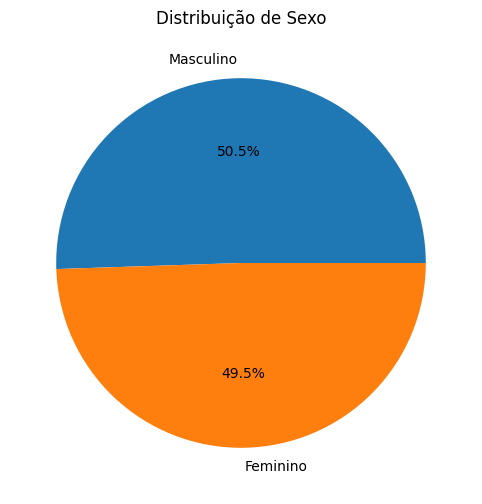

In [12]:
# Agrupar dados
sexo_porcentagem = df['sex'].value_counts(normalize=True) * 100
# Renomeia
sexo_porcentagem.index = sexo_porcentagem.index.map({'female': 'Feminino', 'male': 'Masculino'})

# Cria o gráfico
plt.figure(figsize=(10,6))
plt.pie(sexo_porcentagem, labels=sexo_porcentagem.index, autopct='%1.1f%%')
plt.title('Distribuição de Sexo')
plt.show()

> Diferença muito pequena entre Homens e Mulheres, sexo masculino tem apenas 1% a mais

### Custo médio por sexo

In [13]:
# Agrupar dados
custo_por_sexo = df.groupby('sex')['charges'].mean()

custo_por_sexo

,charges
sex,
female,12569.578844
male,13956.751178


### Verificando distribuição de idade pelo grupo segurado

Text(0.5, 1.0, 'Distribuição de Idade e Segurados')

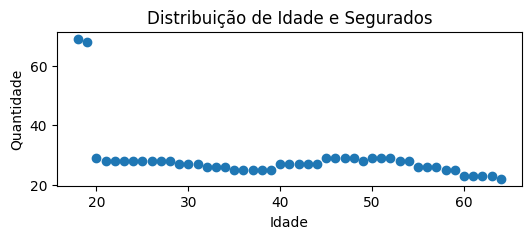

In [14]:
# Agrupar dados
distribuicao_idade = df['age'].value_counts().sort_index()

#cria o gráfico
plt.figure(figsize=(6,2))
plt.scatter(distribuicao_idade.index, distribuicao_idade.values)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição de Idade e Segurados')

> Temos uma divisão quase regular por idade, se destacando os mais jovens na idade de 18 e 19 anos

### Distribuição por Faixa Etária

> Como prática de mercado planos de saúde fazem a precificação por faixa etária, utilizando o exemplo abaixo vamos verificar a ocorrência de segurados e custo médio.

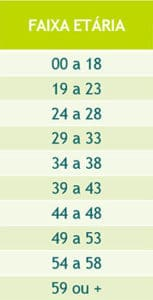

In [182]:
# Adicionado nova coluna de acordo com a faixa etária

def age_category(age):
  if age >= 59:
    return "59 ou +"
  elif age >= 54:
    return "54 a 58"
  elif age >= 49:
    return "49 a 53"
  elif age >= 44:
    return "44 a 48"
  elif age >= 39:
    return "39 a 43"
  elif age >= 34:
    return "34 a 38"
  elif age >= 29:
    return "29 a 33"
  elif age >= 24:
    return "24 a 28"
  elif age >= 19:
    return "19 a 23"
  else:
    return "00 a 18"

df['age_category'] = df['age'].apply(age_category)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,19 a 23
1,18,male,33.770,1,no,southeast,1725.55230,00 a 18
2,28,male,33.000,3,no,southeast,4449.46200,24 a 28
3,33,male,22.705,0,no,northwest,21984.47061,29 a 33
4,32,male,28.880,0,no,northwest,3866.85520,29 a 33


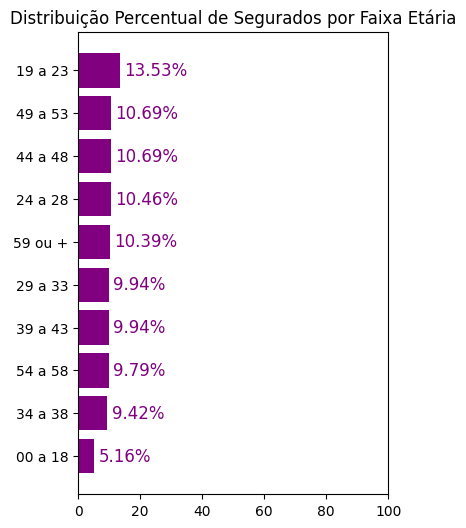

In [241]:
# Agrupar dados
distribuicao_faixa_etaria = df.groupby('age_category').size()

# Transformar em porcentagem
total = distribuicao_faixa_etaria.sum()
porcentagem_faixa_etaria = (distribuicao_faixa_etaria / total) * 100

# Ordena os valores em ordem crescente
porcentagem_faixa_etaria = porcentagem_faixa_etaria.sort_values()

# Cria o gráfico
plt.figure(figsize=(4,6))
barras = plt.barh(porcentagem_faixa_etaria.index, porcentagem_faixa_etaria.values, color= 'purple')
plt.bar_label(barras,
              labels=[f'{x:.2f}%' for x in porcentagem_faixa_etaria.values], # formata como porcentagem com duas casas
              fontsize=12,
              padding=3,
              color='purple')

plt.title('Distribuição Percentual de Segurados por Faixa Etária')
plt.xlim(0,100)
plt.show()

### Custo médio por Faixa Etária


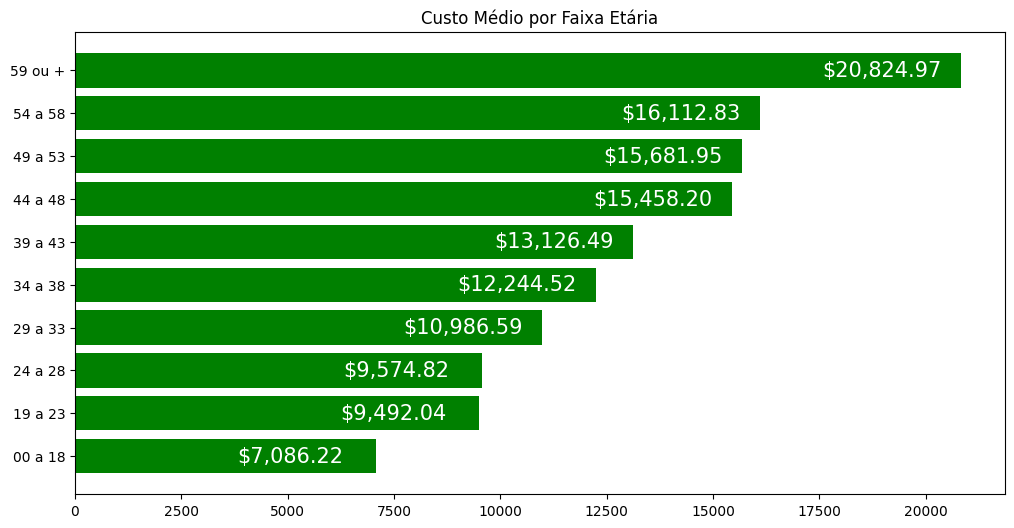

In [73]:
# Agrupar dados
custo_faixa_etaria = df.groupby('age_category')['charges'].mean()

# Ordena os valores em ordem crescente
custo_faixa_etaria = custo_faixa_etaria.sort_values()

# Cria o gráfico
plt.figure(figsize=(12,6))
barras = plt.barh(custo_faixa_etaria.index, custo_faixa_etaria.values, color= 'green')
plt.bar_label(barras,
              labels=[f'${x:,.2f}' for x in custo_faixa_etaria.values], # formatacao de milhar no rotulo
              fontsize=15,
              padding=-100, # valor negativo para jogar para dentro da barra
              color='white')

plt.title('Custo Médio por Faixa Etária')
plt.show()

> Como é de se supor, segurado com maior idade tende de ter média de gastos maior.

### Distribuição de fumantes e não fumantes

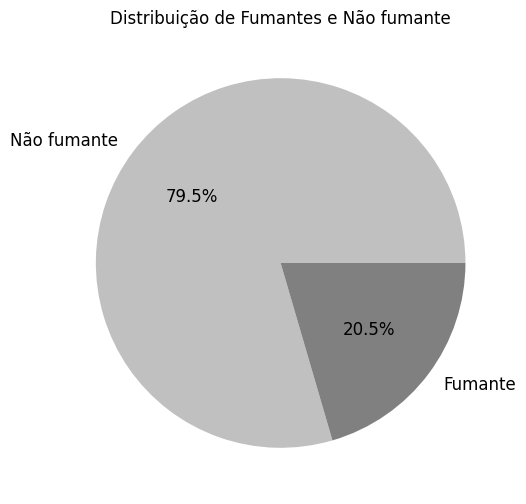

In [244]:
# Agrpando dados
fumantes_porcentagem = df['smoker'].value_counts(normalize=True) * 100
# Renomeando indice
fumantes_porcentagem.index = fumantes_porcentagem.index.map({'no': 'Não fumante', 'yes': 'Fumante'})
# Cria o gráfico
plt.figure(figsize=(10,6))
plt.pie(fumantes_porcentagem, labels=fumantes_porcentagem.index,
        autopct='%1.1f%%',
        colors= ['silver','gray'],
        textprops={'fontsize': 12}
        )
plt.title('Distribuição de Fumantes e Não fumante')
plt.show()

> Grupo de fumantes é de 20.5% da carteira de segurados

### Custo médio por fumantes x não fumantes

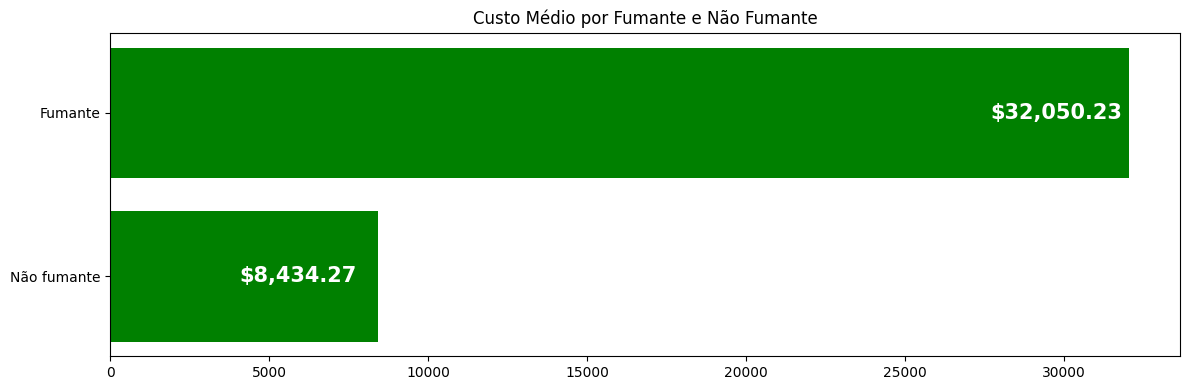

In [245]:
# Agrupar dados
custo_medio_fumantes_nao_fumantes = df.groupby('smoker')['charges'].mean()
# Renomeando indice
custo_medio_fumantes_nao_fumantes.index = custo_medio_fumantes_nao_fumantes.index.map({'no': 'Não fumante', 'yes': 'Fumante'})

# Cria o gráfico
plt.figure(figsize=(12,4))
barras = plt.barh(custo_medio_fumantes_nao_fumantes.index, custo_medio_fumantes_nao_fumantes.values,color='green')
plt.bar_label(barras,
              labels=[f'${x:,.2f}' for x in custo_medio_fumantes_nao_fumantes.values], # formatacao de milhar no rotulo
              fontsize=15,
              padding=-100, # valor negativo para jogar para dentro da barra
              fontweight='bold',
              color='white')
plt.title('Custo Médio por Fumante e Não Fumante')
plt.tight_layout()
plt.show()


> Apesar de compor aproximadamente um quinto dos segurados, fumantes tem o custo médio quase 4x maior que segurados não fumantes.

### Segurados por BMI (IMC)

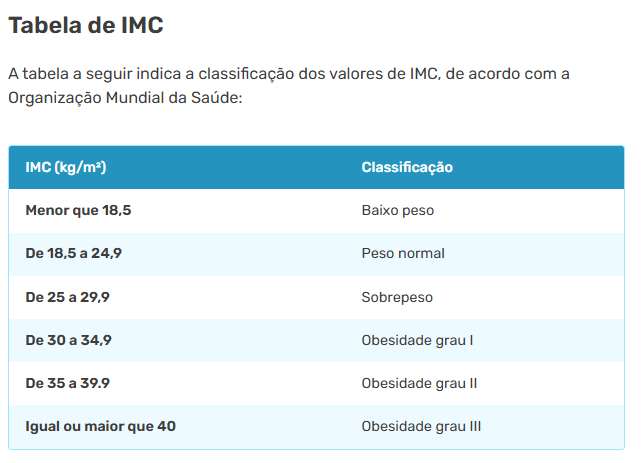

In [184]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,19 a 23
1,18,male,33.770,1,no,southeast,1725.55230,00 a 18
2,28,male,33.000,3,no,southeast,4449.46200,24 a 28
3,33,male,22.705,0,no,northwest,21984.47061,29 a 33
4,32,male,28.880,0,no,northwest,3866.85520,29 a 33


Para facilitar a análise adicionei uma nova coluna com base no Indicie BMI (IMC)

In [185]:
# Adicionado nova coluna de acordo o BMI

def bmi_category (bmi):
  if bmi >= 40:
    return "Obesidade Grau 3"
  elif bmi >= 35:
    return "Obesidade Grau 2"
  elif bmi >= 30:
    return "Obesidade Grau 1"
  elif bmi >= 25:
    return "Sobrepeso"
  elif bmi >= 18.5:
    return "Normal"
  else:
    return "Baixo Peso"

df['bmi_category'] = df['bmi'].apply(bmi_category)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_category,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,19 a 23,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,00 a 18,Obesidade Grau 1
2,28,male,33.000,3,no,southeast,4449.46200,24 a 28,Obesidade Grau 1
3,33,male,22.705,0,no,northwest,21984.47061,29 a 33,Normal
4,32,male,28.880,0,no,northwest,3866.85520,29 a 33,Sobrepeso


In [186]:
# Agrupar dados e contar a ocorrência
taxa_bmi = df.groupby('bmi_category').size().reset_index(name='count')

# Ordernar
taxa_bmi = taxa_bmi.sort_values(by='count', ascending=False)

display(taxa_bmi)

,bmi_category,count
2,Obesidade Grau 1,391
5,Sobrepeso,386
3,Obesidade Grau 2,225
1,Normal,225
4,Obesidade Grau 3,91
0,Baixo Peso,20


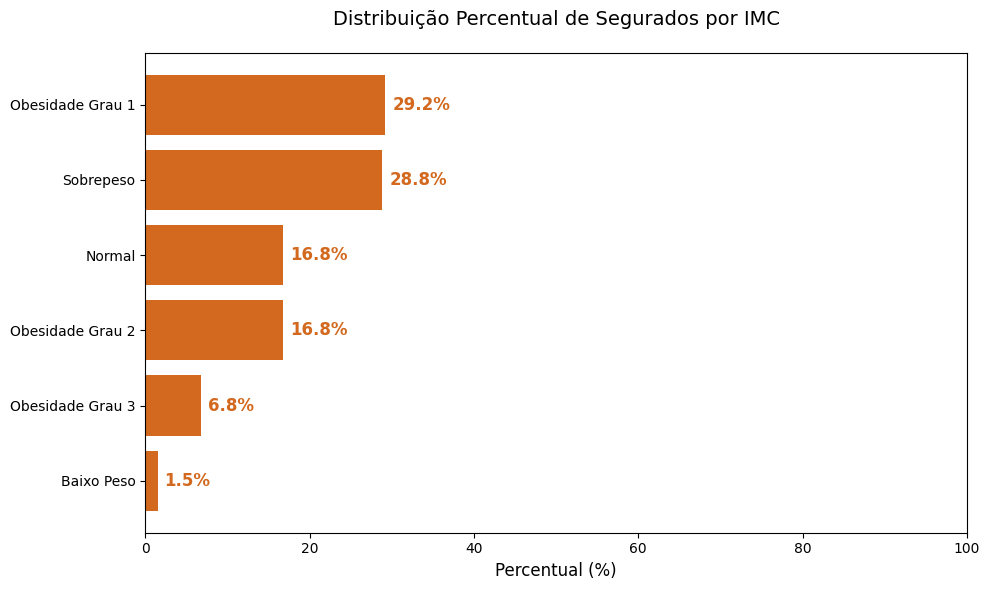

In [231]:
# Agrupando dados
taxa_bmi = df.groupby('bmi_category').size()

# Transformar em porcentagem
total_bmi = taxa_bmi.sum()
porcentagem_bmi = (taxa_bmi / total_bmi) * 100

# Ordena os valores em ordem crescente
porcentagem_bmi = porcentagem_bmi.sort_values()

# Cria o gráfico
plt.figure(figsize=(10, 6))
barras = plt.barh(porcentagem_bmi.index, porcentagem_bmi.values,
                  color=['chocolate'] * len(porcentagem_bmi))

# Adiciona os rótulos com formatação
plt.bar_label(barras,
             labels=[f'{x:.1f}%' for x in porcentagem_bmi.values],
             fontsize=12,
            fontweight='bold',
             padding=5,
             color='chocolate')

# Melhorias no layout
plt.title('Distribuição Percentual de Segurados por IMC', fontsize=14, pad=20)
plt.xlabel('Percentual (%)', fontsize=12)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [188]:
# Analisando distribuição de indice BMI(IMC) por faixa etária

tabela_bmi_idade = df.groupby(['age_category', 'bmi_category']).size().unstack()

tabela_bmi_idade


bmi_category,Baixo Peso,Normal,Obesidade Grau 1,Obesidade Grau 2,Obesidade Grau 3,Sobrepeso
age_category,,,,,,
00 a 18,2.0,11.0,21.0,14.0,7.0,14.0
19 a 23,5.0,38.0,56.0,26.0,7.0,49.0
24 a 28,4.0,31.0,44.0,10.0,9.0,42.0
29 a 33,1.0,26.0,29.0,27.0,8.0,42.0
34 a 38,3.0,18.0,35.0,16.0,8.0,46.0
39 a 43,1.0,24.0,40.0,17.0,10.0,41.0
44 a 48,NaN,23.0,37.0,28.0,10.0,45.0
49 a 53,2.0,23.0,43.0,28.0,12.0,35.0
54 a 58,1.0,15.0,47.0,20.0,13.0,35.0


In [189]:
# Criando vizualização da tabela acima

ordem_bmi = [
    'Baixo Peso',
    'Normal',
    'Sobrepeso',
    'Obesidade Grau 1',
    'Obesidade Grau 2',
    'Obesidade Grau 3'
]

ordem_idade = [
    '00 a 18', '19 a 23', '24 a 28', '29 a 33', '34 a 38',
    '39 a 43', '44 a 48', '49 a 53', '54 a 58', '59 ou +'
]

# Contagem
contagem = (
    df.groupby('age_category')['bmi_category']
    .value_counts()
    .unstack()
    .fillna(0)
    .reindex(index=ordem_idade, columns=ordem_bmi, fill_value=0)
)

# Converter para dicionário
resultados = contagem.apply(lambda row: row.astype(int).tolist(), axis=1).to_dict()

print(resultados)

{'00 a 18': [2, 11, 14, 21, 14, 7], '19 a 23': [5, 38, 49, 56, 26, 7], '24 a 28': [4, 31, 42, 44, 10, 9], '29 a 33': [1, 26, 42, 29, 27, 8], '34 a 38': [3, 18, 46, 35, 16, 8], '39 a 43': [1, 24, 41, 40, 17, 10], '44 a 48': [0, 23, 45, 37, 28, 10], '49 a 53': [2, 23, 35, 43, 28, 12], '54 a 58': [1, 15, 35, 47, 20, 13], '59 ou +': [1, 16, 37, 39, 39, 7]}


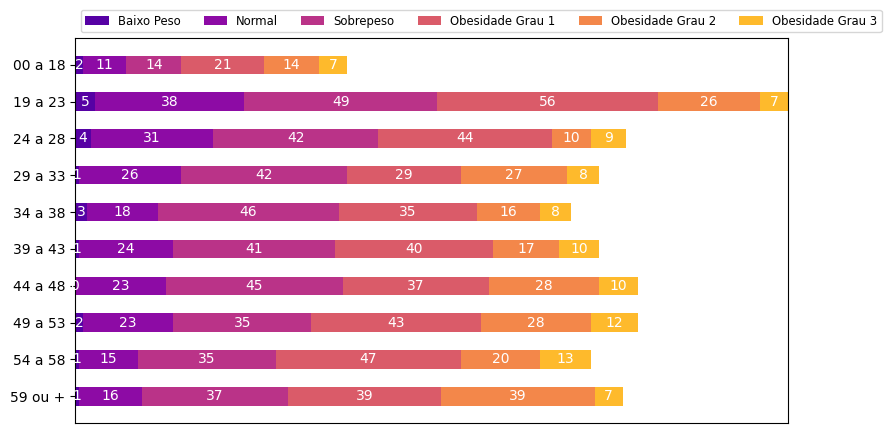

In [190]:
def idade_bmi(resultados, ordem_bmi):
  labels = list(resultados.keys())
  data = np.array(list(resultados.values()))
  data_cum = data.cumsum(axis=1)
  category_colors = plt.colormaps['plasma'](
    np.linspace(0.15, 0.85, data.shape[1]))

  fig, ax = plt.subplots(figsize=(9.2, 5))
  ax.invert_yaxis()
  ax.xaxis.set_visible(False)
  ax.set_xlim(0, np.sum(data, axis=1).max())

  for i, (colname, color) in enumerate(zip(ordem_bmi, category_colors)):
      widths = data[:, i]
      starts = data_cum[:, i] - widths
      rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

      r, g, b, _ = color
      text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
      ax.bar_label(rects, label_type='center', color=text_color)
  ax.legend(ncols=len(ordem_bmi), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

  return fig, ax

idade_bmi(resultados, ordem_bmi)
plt.show()

### Custos por indice BMI (IMC)

In [191]:
# Agrupando dados
taxa_bmi_custos = df.groupby(bmi_category)['charges'].mean()

taxa_bmi_custos

,charges
Baixo Peso,11169.001194
Normal,16543.139917
Obesidade Grau 1,21487.243978
Obesidade Grau 2,21497.512880
Obesidade Grau 3,13210.495802
Sobrepeso,16441.558670


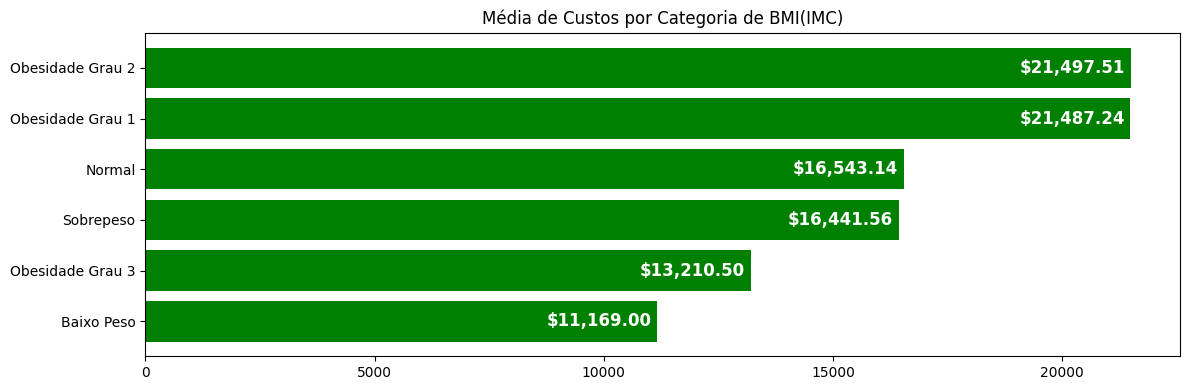

In [232]:
# Ordena os valores em ordem crescente
taxa_bmi_custos = taxa_bmi_custos.sort_values()

plt.figure(figsize=(12,4))
barras = plt.barh(taxa_bmi_custos.index, taxa_bmi_custos.values, color='green')
plt.bar_label(barras,
              labels=[f'${x:,.2f}' for x in taxa_bmi_custos.values], # formatacao de milhar no rotulo
              fontsize=12,
              fontweight='bold',
              padding=-80,
              color='white')
plt.title('Média de Custos por Categoria de BMI(IMC)')
plt.tight_layout()
plt.show()

> Comparando com o gráfico anterior, podemos confirmar que a obesidade tem influência sobre a média de custos, apesar o custo de pessoas com "Obesidade Grau 3" estarem abaixo de pessoas do indice "Normal" e "Sobrepeso" que são indices melhores, temos que observar também a quantidade de pessoas, e outros fatores como idade e se são fumantes ou não.

### Comparação grupo de Alto Custo e os Demais Segurados

In [193]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_category,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,19 a 23,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,00 a 18,Obesidade Grau 1
2,28,male,33.000,3,no,southeast,4449.46200,24 a 28,Obesidade Grau 1
3,33,male,22.705,0,no,northwest,21984.47061,29 a 33,Normal
4,32,male,28.880,0,no,northwest,3866.85520,29 a 33,Sobrepeso


In [195]:
# Criar condição para identificar o grupo de alto custo
condicao_alto_custo = (
    (df['age_category'] == '59 ou +') &
    (df['smoker'] == 'yes') &
    (df['bmi_category'] == 'Obesidade Grau 1') | (df['bmi_category'] == 'Obesidade Grau 2')
)

# Adicionar nova coluna
df['grupo_custo'] = np.where(condicao_alto_custo, 'Alto Custo', 'Demais Segurados')

In [196]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_category,bmi_category,grupo_custo
0,19,female,27.900,0,yes,southwest,16884.92400,19 a 23,Sobrepeso,Demais Segurados
1,18,male,33.770,1,no,southeast,1725.55230,00 a 18,Obesidade Grau 1,Demais Segurados
2,28,male,33.000,3,no,southeast,4449.46200,24 a 28,Obesidade Grau 1,Demais Segurados
3,33,male,22.705,0,no,northwest,21984.47061,29 a 33,Normal,Demais Segurados
4,32,male,28.880,0,no,northwest,3866.85520,29 a 33,Sobrepeso,Demais Segurados


In [218]:
# Verificando percentual de custo por nova divisão

custo_grupo_total = df.groupby('grupo_custo')['charges'].sum()

df_custo_total = pd.DataFrame({
    'Grupo': custo_grupo_total.index,
    'Porcentagem': [f'{(x/custo_grupo_total.sum()* 100):.2f}%' for x in custo_grupo_total]})

df_custo_total

,Grupo,Porcentagem
0,Alto Custo,23.97%
1,Demais Segurados,76.03%


Text(0.5, 1.0, 'Porcentagem de Custos por Grupo')

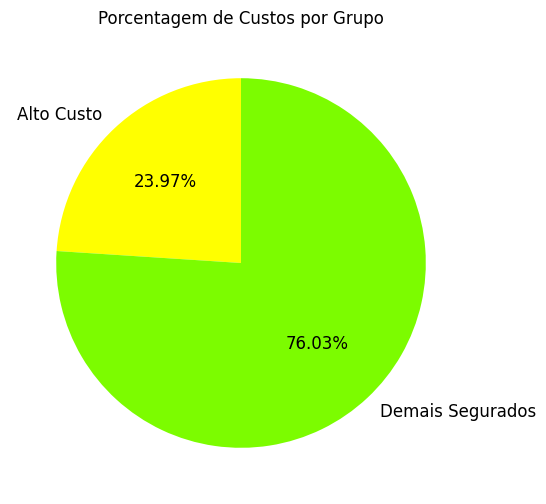

In [237]:
# Criando gráfico

plt.figure(figsize=(8, 6))
plt.pie(custo_grupo_total,
        labels=custo_grupo_total.index,
        autopct='%1.2f%%',
        colors=['yellow','lawngreen'] ,
        textprops={'fontsize': 12},
        startangle=90)
plt.title('Porcentagem de Custos por Grupo')

In [238]:
analise_comparativa = df.groupby('grupo_custo').agg({
    'charges': ['sum', 'mean', 'count']
}).reset_index()

# Dividindo por 1.000 (
analise_comparativa[('charges', 'sum')] = analise_comparativa[('charges', 'sum')] / 1000
analise_comparativa[('charges', 'mean')] = analise_comparativa[('charges', 'mean')] / 1000

(
    analise_comparativa
    .style
    .format({
        ('charges', 'sum'): '${:,.1f} mil',
        ('charges', 'mean'): '${:,.1f} mil'
    })
)